In [1]:
# IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORTING DATASET
data = pd.read_csv('Loan Prediction train data.csv')

In [3]:
# FIRST 5 ROWS
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# CHECKING NULL VALUES
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# FILLING NULL VALUES WITH MOST FREQUENT DATA / MODE
data.Gender.fillna('Male',inplace=True)
data.Married.fillna('Yes',inplace=True)
data.Dependents.fillna(0,inplace=True)
data.Self_Employed.fillna('No',inplace=True)
data.Loan_Amount_Term.fillna(360,inplace=True)
data.Credit_History.fillna(1.0,inplace=True)

In [6]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# DROPING NULL VALUES FOR LOAN AMOUNT
data.dropna(inplace=True)
data.shape

(592, 13)

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Analysis

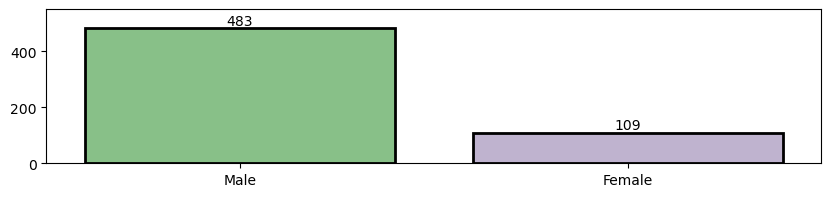

In [9]:
# NUMBER OF MALE AND FEMALE IN THIS DATASET
fig,ax = plt.subplots(figsize=(10,2))
A = sns.barplot(list(data['Gender'].value_counts().keys()),list(data['Gender'].value_counts()),ec='k',lw=2,palette='Accent')
ax.bar_label(ax.containers[0])
plt.ylim(0,550)
plt.show()

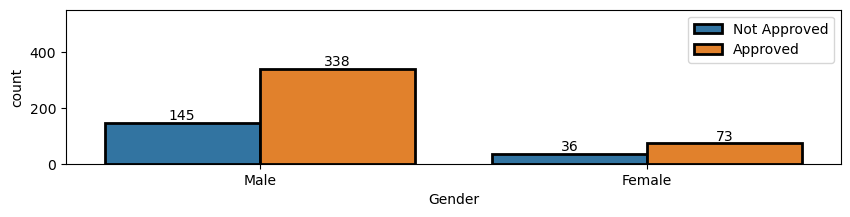

In [10]:
# NUMBER OF MALE AND FEMALE'S LOAN APPLICATION NOT APPROVED AND APPROVED
fig,ax = plt.subplots(figsize=(10,2),)
A = sns.countplot(data=data,x='Gender',hue='Loan_Status',ec='k',lw=2)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(['N','Y'],labels=['Not Approved','Approved'])
plt.ylim(0,550)
plt.show()

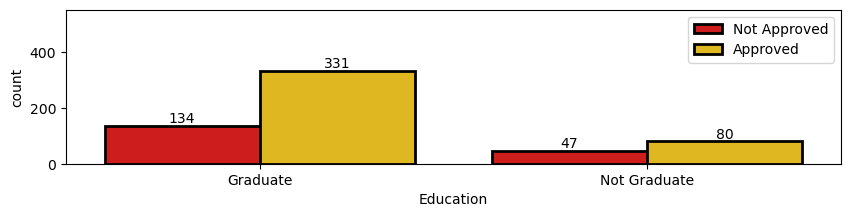

In [11]:
# NUMBER OF GRADUATES AND NON GRADUATES LOAN APPLICATION NOT APPROVED AND APPROVED
fig,ax = plt.subplots(figsize=(10,2),)
A = sns.countplot(data=data,x='Education',hue='Loan_Status',ec='k',lw=2,palette='hot')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(['N','Y'],labels=['Not Approved','Approved'])
plt.ylim(0,550)
plt.show()

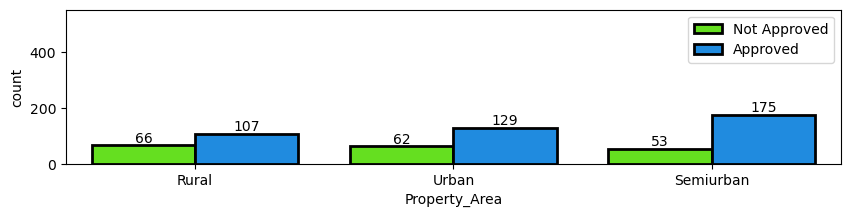

In [12]:
# NUMBER OF APPLICATION NOT APPROVED AND APPROVED AS PER PROPERTY AREA
fig,ax = plt.subplots(figsize=(10,2),)
A = sns.countplot(data=data,x='Property_Area',hue='Loan_Status',ec='k',lw=2,palette='gist_rainbow')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(['N','Y'],labels=['Not Approved','Approved'])
plt.ylim(0,550)
plt.show()

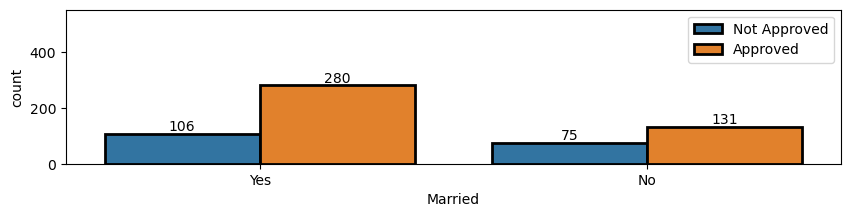

In [13]:
# NUMBER OF MARRIED AND NOT MARRIED LOAN APPLICATION NOT APPROVED AND APPROVED
fig,ax = plt.subplots(figsize=(10,2),)
A = sns.countplot(data=data,x='Married',hue='Loan_Status',ec='k',lw=2)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(['N','Y'],labels=['Not Approved','Approved'])
plt.ylim(0,550)
plt.show()

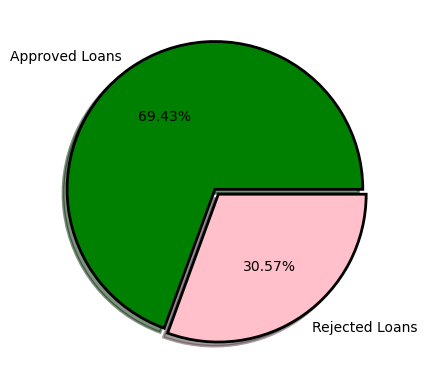

In [14]:
# PIE CHART SHOWING PERCENT OF APPROVED AND REJECTED LOAN APPLICATION IN THIS DATASET 
plt.pie(list(data['Loan_Status'].value_counts()),labels=['Approved Loans','Rejected Loans'],shadow=True,explode=[.04,0]\
       ,startangle=0,autopct=lambda p:f'{p:.2f}%',normalize=True,colors=['g','pink'],wedgeprops = {'linewidth': 2,'ec':'k'})
plt.show()

In [15]:
data.Married.unique()

array(['Yes', 'No'], dtype=object)

In [16]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
data.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
data.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [19]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            592 non-null    object 
 1   Gender             592 non-null    object 
 2   Married            592 non-null    object 
 3   Dependents         592 non-null    object 
 4   Education          592 non-null    object 
 5   Self_Employed      592 non-null    object 
 6   ApplicantIncome    592 non-null    int64  
 7   CoapplicantIncome  592 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   592 non-null    float64
 10  Credit_History     592 non-null    float64
 11  Property_Area      592 non-null    object 
 12  Loan_Status        592 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.8+ KB


In [21]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
# PANDAS.GET_DUMMIES FUNCTION TO CHANGE CATEGORICAL DATA TO NUMERICAL
data1 = pd.get_dummies(data[['Gender', 'Married','Education','Self_Employed','Property_Area']])

In [23]:
data1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1
5,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0,1,0,0
610,0,1,0,1,1,0,1,0,1,0,0
611,0,1,0,1,1,0,1,0,0,0,1
612,0,1,0,1,1,0,1,0,0,0,1


In [24]:
data.drop(columns=['Gender', 'Married','Education','Self_Employed','Property_Area'],inplace=True)

In [25]:
data = pd.concat([data,data1],axis=1)

In [26]:
data

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  592 non-null    object 
 1   Dependents               592 non-null    object 
 2   ApplicantIncome          592 non-null    int64  
 3   CoapplicantIncome        592 non-null    float64
 4   LoanAmount               592 non-null    float64
 5   Loan_Amount_Term         592 non-null    float64
 6   Credit_History           592 non-null    float64
 7   Loan_Status              592 non-null    object 
 8   Gender_Female            592 non-null    uint8  
 9   Gender_Male              592 non-null    uint8  
 10  Married_No               592 non-null    uint8  
 11  Married_Yes              592 non-null    uint8  
 12  Education_Graduate       592 non-null    uint8  
 13  Education_Not Graduate   592 non-null    uint8  
 14  Self_Employed_No         5

In [28]:
# CONVERTING OBJECT DTYPE COLUMN TO INT
data['Dependents'] = data['Dependents'].apply(lambda x: str(x)[0])
data['Dependents'] = data['Dependents'].astype('int')
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1


In [29]:
data.Dependents.unique()

array([1, 0, 2, 3])

In [30]:
X = data.drop(columns=['Loan_ID','Loan_Status'])
Y = data.Loan_Status

In [31]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [32]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
SC.fit(X)

StandardScaler()

In [33]:
X_SC = SC.transform(X)
X_SC

array([[ 0.25283841, -0.13335316, -0.04540431, ...,  1.55626647,
        -0.7914377 , -0.6901516 ],
       [-0.73842211, -0.39038105, -0.55396864, ..., -0.64256348,
        -0.7914377 ,  1.44895702],
       [-0.73842211, -0.45808833,  0.2412533 , ..., -0.64256348,
        -0.7914377 ,  1.44895702],
       ...,
       [ 0.25283841,  0.43314736, -0.47303002, ..., -0.64256348,
        -0.7914377 ,  1.44895702],
       [ 1.24409892,  0.35374961, -0.55396864, ..., -0.64256348,
        -0.7914377 ,  1.44895702],
       [-0.73842211, -0.13335316, -0.55396864, ..., -0.64256348,
         1.26352334, -0.6901516 ]])

In [34]:
# SPLITING THE DATA TO TRAIN AND TEST AND FITTING SVM WITH TRAINING DATA
x_train,x_test,y_train,y_test = train_test_split(X_SC,Y,test_size=.3,random_state=1)
SVM = SVC()
SVM_model = SVM.fit(x_train,y_train)
y_train_pred = SVM_model.predict(x_train)

In [35]:
# CHECKING ACCURACY SCORE OF THE ALGORYTHM IN TRAINING DATA
accuracy_score(y_train_pred,y_train)

0.8260869565217391

In [36]:
# CHECKING ACCURACY SCORE OF THE ALGORYTHM IN TEST DATA
y_test_pred = SVM.predict(x_test)
accuracy_score(y_test_pred,y_test)

0.8258426966292135

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_SC,Y,test_size=.3,random_state=2,stratify=Y)

In [38]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [39]:
# CHECKING ACCURACY SCORE OF THE ALGORYTHM WITH DIFFERENT KERNELS WITH TRAINING DATA
for i in kernel:
    SVM = SVC(kernel=i)
    SVM_model = SVM.fit(x_train,y_train)
    y_train_pred = SVM_model.predict(x_train)
    print(i,accuracy_score(y_train_pred,y_train))

linear 0.8140096618357487
poly 0.8454106280193237
rbf 0.8260869565217391
sigmoid 0.7632850241545893


In [40]:
# CHECKING ACCURACY SCORE OF THE ALGORYTHM WITH DIFFERENT KERNELS WITH TEST DATA
for i in kernel:
    SVM = SVC(kernel=i)
    SVM_model = SVM.fit(x_train,y_train)
    y_test_pred = SVM_model.predict(x_test)
    print(i,accuracy_score(y_test_pred,y_test))

linear 0.8146067415730337
poly 0.8314606741573034
rbf 0.8146067415730337
sigmoid 0.7865168539325843


Looks like Support Vector Machine with 'Poly' Kernel is giving better accuracy on train and test data

# ML MODEL AFTER DROPING ALL NULL VALUES



In [41]:
data1 = pd.read_csv('Loan Prediction train data.csv')
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
data1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
data1.dropna(inplace=True)
data1.shape

(480, 13)

In [44]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [45]:
data1['Dependents'] = data1['Dependents'].apply(lambda x:str(x)[0])
data1['Dependents'] = data1['Dependents'].astype('int')
cat_to_num = pd.get_dummies(data1[['Gender', 'Married','Education','Self_Employed','Property_Area']])
data1.drop(columns=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area'],inplace=True)
data1 = pd.concat([data1,cat_to_num],axis=1)
data1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1


In [46]:
X = data1.drop('Loan_Status',axis=1)
Y = data1['Loan_Status']

In [47]:
X_SC = SC.fit_transform(X)
X_SC

array([[ 0.21859918, -0.13796959, -0.02795204, ...,  1.5662814 ,
        -0.81295735, -0.67419986],
       [-0.76203265, -0.4175358 , -0.604633  , ..., -0.63845488,
        -0.81295735,  1.4832397 ],
       [-0.76203265, -0.49118022,  0.29710022, ..., -0.63845488,
        -0.81295735,  1.4832397 ],
       ...,
       [ 0.21859918,  0.47820635, -0.51285354, ..., -0.63845488,
        -0.81295735,  1.4832397 ],
       [ 1.19923101,  0.39184635, -0.604633  , ..., -0.63845488,
        -0.81295735,  1.4832397 ],
       [-0.76203265, -0.13796959, -0.604633  , ..., -0.63845488,
         1.23007683, -0.67419986]])

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X_SC,Y,test_size=.3,random_state=2,stratify=Y)

In [49]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [50]:
for i in kernel:
    SVM = SVC(kernel=i)
    SVM_model = SVM.fit(x_train,y_train)
    y_train_pred = SVM_model.predict(x_train)
    print(i,accuracy_score(y_train_pred,y_train))

linear 0.8005952380952381
poly 0.8511904761904762
rbf 0.8214285714285714
sigmoid 0.7589285714285714


In [51]:
for i in kernel:
    SVM = SVC(kernel=i)
    SVM_model = SVM.fit(x_train,y_train)
    y_test_pred = SVM_model.predict(x_test)
    print(i,accuracy_score(y_test_pred,y_test))

linear 0.8263888888888888
poly 0.8125
rbf 0.8263888888888888
sigmoid 0.8263888888888888
